<h3 style="text-align:center; font-size:36px; color:black; font-weight:bold">Credit Score Case</h3>
<h3 style="text-align:center; font-size:26px; color:black">Exploratory Data Analysis</h3>

---

# 1. Importing libraries

In [79]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


---

# 2. Descriptive Analysis

The database consist of a set of 11 variables, wherein, the variable called "Default" represents the varible target or dependent variable and the others are the independent variable.

A brief description of each variable or column are described in table bellow:

| Variable Long Name | Variable Short Name | Type | Description |
|---|---|---|---|
| Default | **Default** | Categorical | whether client is default 1, otherwise 0 |
| Utilization of Insecure Credit Lines | **UIL** | Continuous | Credit Risk (0-1) |
| Age | **age** | Continuous | Client's age |
| Rate Debt Annual Wage| **RDW** | Continuous | Rate of Debt by annual earnings or wage |
| Monthly Wage | **MW** | Continuous | Monthly Wage |
| Default 30-59 | **NTD3059** | Categorical Ordinal | Number of times wherein the client is in default from 30 to 59 days |
| Default 60-89 | **NTD6090** | Categorical Ordinal | Number of times wherein the client is in default from 60 to 89 days |
| Default 90 | **NTDGT90** | Categorical Ordinal |Number of times wherein the client is in default greater or equal than 90 days |
| Numbers of loans | **NB** | Categorical Ordinal | Current number of bank loans |
| Number of dependents | **ND** | Categorical Ordinal | Current Number of dependents on income tax |
| Open Credit Lines | **OCL** | Categorical Ordinal | Number of open credit lines |

## 2.1. Reading the Data

In [80]:
# Reading file from disk
file = os.path.join('data','training_data.csv')
df = pd.read_csv(file)

# Proper Column Categorization
categorical = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df = df.assign(**{col: df[col].astype('category') for col in categorical})

df.head(5)

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


## 2.2. Pre Analysis

### 2.2.1. Proportions of Nulls 

In [81]:
null_prop = df.isnull().mean()
pd.DataFrame(null_prop).transpose()

,Default,UIS,age,NTD3059,RDW,MW,OCL,NTDGT90,NB,NTD6089,ND
0,0.0,0.0,0.0,0.0,0.0,0.197845,0.0,0.0,0.0,0.0,0.026164


As we can see the variables MW (Monthly Wage) and ND (Number of Dependants) have the following proportion of nulls, 
20% and 3% respectively.

### 2.2.2. Continuous Variables

In [82]:
custom_quantiles = [ 0.05, 0.25, 0.75, 0.95, 0.99 ]
df_describe = df.describe(percentiles=custom_quantiles)
df_describe.round(2)

,Default,UIS,age,RDW,MW
count,110000.00,110000.00,110000.00,110000.00,88237.00
mean,0.07,5.93,52.26,354.82,6637.41
std,0.25,252.30,14.77,2074.14,13383.95
min,0.00,0.00,0.00,0.00,0.00
5%,0.00,0.00,29.00,0.00,1300.00
25%,0.00,0.03,41.00,0.18,3400.00
50%,0.00,0.16,52.00,0.37,5400.00
75%,0.00,0.56,63.00,0.87,8225.00
95%,1.00,1.00,78.00,2464.05,14593.40
99%,1.00,1.09,87.00,5000.01,25000.00


Above a summary containing the main resume measurements of continuous variables is presented. Comparing the median to the mean, we can see that UIS, RDW and MW variables are skilled toward lower values due to the mean be significantly greater than the median, while the age has the mean and the median (50%) nearer each other.

Still in the above table, looking at the higher percentiles, for UIS column the 99th percentile is 1.00 while the maximum is a value above 50k, in this case it is evident the presence of outliers. For the variables or columns RDW and MW we can conclude the same while for MW (Monthly Wage) could be people that earns a salary above $300k per month. And finaly fot the age column, we observe that the minimum age is 0, so this is not an expected age, since the majority age in country BR is 18 years.

To deal with the **outliers**, we will use the following rule, if a cell value is above or equal to the 99th percentile, a null value will be assigned, otherwise it does not change, this rule will be applied to UIS, RDW and MW. For age the opposite rule will be applied, but for values less than 18 years.

In [84]:
# Dealing with outliers in continuous
colls = ['UIS','RDW','MW']
vals = [1,1,14593.40]
for col, val in zip(colls, vals):
    df.loc[df[col] >  val, col] = np.nan
df.loc[df['age'] < 18, 'age'] = np.nan

custom_quantiles = [ 0.05, 0.25, 0.75, 0.95, 0.99 ]
df.describe(percentiles=custom_quantiles).round(2)

,Default,UIS,age,RDW,MW
count,110000.00,107548.00,109999.00,84255.00,83825.00
mean,0.07,0.30,52.26,0.30,5668.03
std,0.25,0.34,14.77,0.23,3164.74
min,0.00,0.00,21.00,0.00,0.00
5%,0.00,0.00,29.00,0.00,1208.20
25%,0.00,0.03,41.00,0.13,3300.00
50%,0.00,0.15,52.00,0.27,5133.00
75%,0.00,0.52,63.00,0.44,7689.00
95%,1.00,1.00,78.00,0.74,11781.80
99%,1.00,1.00,87.00,0.94,13750.00


In table above, the summary of the continuous variables after the treatment is shown. Comparing to the previous one, we can see that the appointed variables still present the same pattern of assimetry toward low values, and the age still maintains it simetric pattern. But now with expected values.

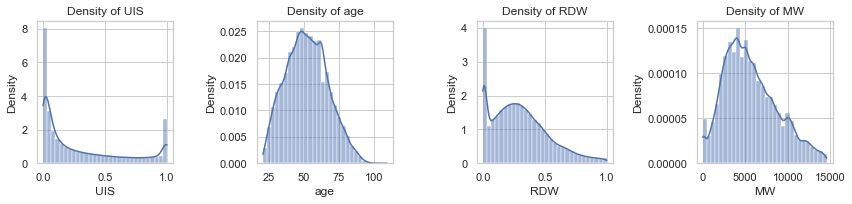

In [92]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(12, 3))

# Flatten the axes for easier iteration
axes = axes.flatten()

cols = ['UIS','age','RDW','MW']
# Iterate through each column and plot the PDF
for i, col in enumerate(cols):
    #sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    sns.histplot(data=df, x=col, stat="density", bins = 30, kde=True, ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

Above, histograms showing the probability density function of continuous variables is depicted. As we can see the patterns analized previously remain the same. However, in the variable age we can see a slight assimetry toward lower values and even two modes. 


### 2.2.3. Ordinal Categorical Variables

In [95]:
categorical = ['NTD3059','NTD6089','NTDGT90','NB','ND','OCL']
df[categorical].describe()

,NTD3059,NTD6089,NTDGT90,NB,ND,OCL
count,110000,110000,110000,110000,107122.0,110000
unique,15,13,18,28,12.0,57
top,0,0,0,0,0.0,6
freq,92469,104466,103836,41159,63652.0,9988


For ordinal categorical variables, we can see that for variables related to existence of default in n days (NTD...), the frequency of the top category is above 90%. For NB, ND and OCL, the distribution seems more equilibrated. Once, this variables are ordinal we can use histograms to see the individual distribution of each variable.

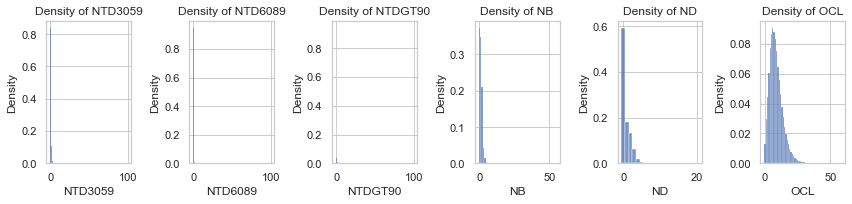

In [99]:
sns.set(style="whitegrid")

# Set the style for the plots (optional)
sns.set(style="whitegrid")

# Create subplots with 4 columns per row
fig, axes = plt.subplots(nrows=1, ncols=6, figsize=(12, 3))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Iterate through each column and plot the PDF
for i, col in enumerate(categorical):
    #sns.kdeplot(data=df[column], ax=axes[i], fill=True)
    sns.histplot(data=df, x=col, stat="density", ax=axes[i], fill=True)
    axes[i].set_title(f'Density of {col}')
    
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()